In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN,  Embedding, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [33]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000)

In [34]:
x_train.shape

(8982,)

In [35]:
y_train.shape

(8982,)

In [36]:
x_train[:3]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [37]:
y_train[:3]

array([3, 4, 3])

In [38]:
np.max(y_train) + 1 # 46개의 뉴스 카테고리..

46

In [39]:
lenght = [len(x) for x in x_train]

(array([9.680e+02, 1.324e+03, 1.435e+03, 1.482e+03, 7.290e+02, 3.690e+02,
        4.230e+02, 4.010e+02, 2.960e+02, 1.920e+02, 1.730e+02, 1.680e+02,
        1.660e+02, 8.200e+01, 8.800e+01, 7.600e+01, 6.300e+01, 5.300e+01,
        5.300e+01, 6.500e+01, 3.700e+01, 3.900e+01, 3.300e+01, 2.600e+01,
        3.500e+01, 2.900e+01, 3.000e+01, 1.300e+01, 2.300e+01, 2.400e+01,
        1.400e+01, 1.400e+01, 1.200e+01, 1.300e+01, 7.000e+00, 8.000e+00,
        5.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

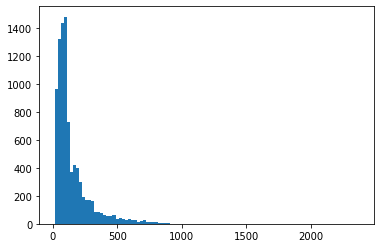

In [40]:
plt.hist(lenght, bins=100)

In [41]:
x_train_seq = pad_sequences(x_train, maxlen=200)
x_test_seq = pad_sequences(x_test, maxlen=200)

In [43]:
x_trian_oh = to_categorical(x_train)

ValueError: ignored

In [44]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [45]:
x_train_seq.shape

(8982, 200)

In [46]:
model = Sequential()
model.add(Embedding(1000, 30))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 30)          30000     
                                                                 
 dropout_2 (Dropout)         (None, None, 30)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          9664      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, None, 100)         66000     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                      

In [47]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
hist = model.fit(x_train_seq, y_train_oh.astype(float), epochs=100, batch_size=20, validation_data=(x_test_seq, y_test_oh))

Epoch 1/100
166/450 [==========>...................] - ETA: 25s - loss: 2.4526 - accuracy: 0.3627

In [ ]:
y_train_oh